# MTA Transportation Mminimum Viable Product

## Augustine Bowe

### Identifying Trends in Declining Subway Use in Manhattan as a result of COVID 19

In [1]:
import pandas as pd
import datetime as dt
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy as db

turnstiles_df = pd.read_csv("/Users/augustinebowe/Downloads/mta_data.csv")

Populating the interactive namespace from numpy and matplotlib


In [4]:
engine = db.create_engine('sqlite:////Users/augustinebowe/Downloads/mta_data.db')
connection = engine.connect()
engine.table_names()

/var/folders/6l/hl1r0ft932qd3p4vqcjhyw7r0000gn/T/ipykernel_6383/2809197655.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta_data']

In [6]:
sql = "SELECT * FROM mta_data WHERE STATION IN ('GRD CNTRL-42 ST','FULTON ST','86 ST','125 ST')"
turnstiles_df1 = pd.read_sql(sql,con=engine)
turnstiles_df1.head

<bound method NDFrame.head of           C/A  UNIT       SCP    STATION  LINENAME DIVISION        DATE  \
0        A077  R028  03-00-00  FULTON ST  ACJZ2345      BMT  12/18/2021   
1        A077  R028  03-00-00  FULTON ST  ACJZ2345      BMT  12/18/2021   
2        A077  R028  03-00-00  FULTON ST  ACJZ2345      BMT  12/18/2021   
3        A077  R028  03-00-00  FULTON ST  ACJZ2345      BMT  12/18/2021   
4        A077  R028  03-00-00  FULTON ST  ACJZ2345      BMT  12/18/2021   
...       ...   ...       ...        ...       ...      ...         ...   
1395087  R305  R206  01-00-02     125 ST        23      IRT  04/05/2019   
1395088  R305  R206  01-00-02     125 ST        23      IRT  04/05/2019   
1395089  R305  R206  01-00-02     125 ST        23      IRT  04/05/2019   
1395090  R305  R206  01-00-02     125 ST        23      IRT  04/05/2019   
1395091  R305  R206  01-00-02     125 ST        23      IRT  04/05/2019   

             TIME     DESC    ENTRIES      EXITS  
0        02:00:00 

We will examine data from three different years: 2019, 2020 and 2021 in order to compare data from after the pandemic began to a baseline year before

We will examine a subset of stations located in different parts of Manhattan to see if the trends are the same in residential and commerical areas

In [8]:
turnstiles_df1['date_time'] = pd.to_datetime(turnstiles_df1.DATE + " " + turnstiles_df1.TIME)
turnstiles_df1['YEAR'] = turnstiles_df1.date_time.dt.year
turnstiles_df1 = turnstiles_df1[turnstiles_df1.YEAR != 2018]

turnstiles_df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,YEAR
0,A077,R028,03-00-00,FULTON ST,ACJZ2345,BMT,12/18/2021,02:00:00,REGULAR,488014,158691,2021-12-18 02:00:00,2021
1,A077,R028,03-00-00,FULTON ST,ACJZ2345,BMT,12/18/2021,06:00:00,REGULAR,488022,158696,2021-12-18 06:00:00,2021
2,A077,R028,03-00-00,FULTON ST,ACJZ2345,BMT,12/18/2021,10:00:00,REGULAR,488044,158717,2021-12-18 10:00:00,2021
3,A077,R028,03-00-00,FULTON ST,ACJZ2345,BMT,12/18/2021,14:00:00,REGULAR,488111,158750,2021-12-18 14:00:00,2021
4,A077,R028,03-00-00,FULTON ST,ACJZ2345,BMT,12/18/2021,18:00:00,REGULAR,488190,158791,2021-12-18 18:00:00,2021


In [9]:
subset_daily = turnstiles_df1.groupby(['STATION','C/A', 'UNIT', 'SCP','DATE', "YEAR"],as_index = False).ENTRIES.max()
subset_daily.head()

,STATION,C/A,UNIT,SCP,DATE,YEAR,ENTRIES
0,125 ST,N025,R102,01-00-00,03/27/2021,2021,276173
1,125 ST,N025,R102,01-00-00,03/28/2020,2020,155583
2,125 ST,N025,R102,01-00-00,03/28/2021,2021,276440
3,125 ST,N025,R102,01-00-00,03/29/2020,2020,155689
4,125 ST,N025,R102,01-00-00,03/29/2021,2021,276808


In [10]:
subset_daily[["PREV_DATE", "PREV_ENTRIES"]] = subset_daily.groupby(["STATION", "C/A", "UNIT", "SCP", "YEAR"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1))
subset_daily.sample(15)

/var/folders/6l/hl1r0ft932qd3p4vqcjhyw7r0000gn/T/ipykernel_6383/2730180902.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subset_daily[["PREV_DATE", "PREV_ENTRIES"]] = subset_daily.groupby(["STATION", "C/A", "UNIT", "SCP", "YEAR"])["DATE", "ENTRIES"].apply(lambda grp: grp.shift(1))


,STATION,C/A,UNIT,SCP,DATE,YEAR,ENTRIES,PREV_DATE,PREV_ENTRIES
98906,FULTON ST,A082,R028,05-06-01,07/18/2019,2019,702568,07/17/2019,701463.0
121982,FULTON ST,N098,R028,00-00-03,08/30/2020,2020,7972396,08/29/2020,7972175.0
77537,86 ST,R250,R179,00-00-00,06/17/2019,2019,9615206,06/16/2019,9612545.0
107491,FULTON ST,N095,R014,00-05-00,11/25/2020,2020,15123,11/24/2020,15122.0
70371,86 ST,R249,R179,01-00-03,06/20/2019,2019,8433357,06/19/2019,8431681.0
182667,GRD CNTRL-42 ST,R237,R046,01-00-03,09/10/2019,2019,7567030,09/09/2019,7565520.0
35305,86 ST,C025,R215,00-00-00,08/08/2019,2019,242141,08/07/2019,238646.0
217585,GRD CNTRL-42 ST,R240,R047,00-03-02,12/04/2019,2019,248187,12/03/2019,245886.0
198541,GRD CNTRL-42 ST,R238,R046,00-03-04,06/06/2020,2020,37723320,06/05/2020,37723320.0
159589,FULTON ST,R208,R014,03-00-01,08/19/2021,2021,18564,08/18/2021,18531.0


In [11]:
subset_daily.dropna(subset=['PREV_DATE'], axis=0, inplace=True)
subset_daily.head()

,STATION,C/A,UNIT,SCP,DATE,YEAR,ENTRIES,PREV_DATE,PREV_ENTRIES
2,125 ST,N025,R102,01-00-00,03/28/2021,2021,276440,03/27/2021,276173.0
3,125 ST,N025,R102,01-00-00,03/29/2020,2020,155689,03/28/2020,155583.0
4,125 ST,N025,R102,01-00-00,03/29/2021,2021,276808,03/28/2021,276440.0
6,125 ST,N025,R102,01-00-00,03/30/2020,2020,155886,03/29/2020,155689.0
7,125 ST,N025,R102,01-00-00,03/30/2021,2021,277310,03/29/2021,276808.0


In [12]:
def ts_count(entry, max_ent):
    count = entry['ENTRIES'] - entry['PREV_ENTRIES']
    if count < 0:
        count = -count
    if count > max_ent:
        count = 0
    return count
subset_daily['DAILY_ENTRIES'] = subset_daily.apply(ts_count, axis =1, max_ent = 100000)


In [13]:
total_riders = subset_daily.groupby(['DATE','YEAR'], as_index = False).DAILY_ENTRIES.sum()
total_riders['DATE'] = pd.to_datetime(total_riders['DATE'])
total_riders['YEAR'] = total_riders.DATE.dt.year
yearly_riders = total_riders.groupby("YEAR", as_index = False).DAILY_ENTRIES.sum()
yearly_riders.head()

,YEAR,DAILY_ENTRIES
0,2019,95168042.0
1,2020,16699567.0
2,2021,31744737.0


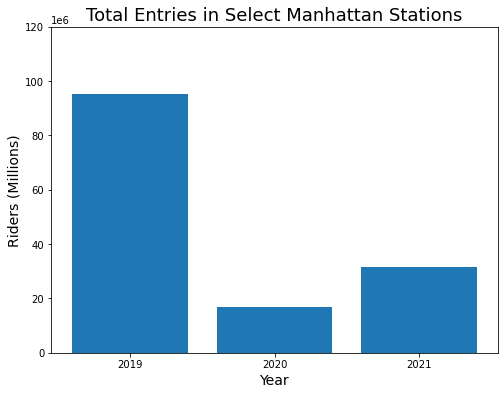

In [34]:
labels = ['2019', '2020', '2021']
y_riders = yearly_riders['DAILY_ENTRIES']
plt.figure(figsize = (8,6))
plt.bar(labels, y_riders)
plt.title('Total Entries in Select Manhattan Stations',fontsize=18)
xlabel("Year",fontsize=14)
ylabel("Riders (Millions)",fontsize = 14)
ylim(0,120000000)
ticklabel_format(axis='y', scilimits=(6,6))
plt.savefig('total-entries')


We see that entries into the select subway stations has dropped precipitously from 2019 to 2020 and 2021, and we know that this will present a challenge to businesses looking to open locations in Manhattan, but we will now examine how the decline in ridership changes from weekdays to weekends, as it's possible that there is a different clientele in Manhattan now than there was before the pandemic

In [15]:
subset_series = subset_daily.groupby(['STATION','DATE','YEAR'],as_index = False).DAILY_ENTRIES.sum()
subset_series['DATE'] = pd.to_datetime(subset_series['DATE'])
subset_series['DAY'] =subset_series.DATE.dt.day_name()
day_legend = {"Monday":"Weekday","Tuesday":"Weekday","Wednesday":"Weekday","Thursday":"Weekday","Friday":"Weekday","Saturday":"Weekend","Sunday":"Weekend"}
subset_series['day_type'] = subset_series.DAY.map(day_legend)

In [16]:
subset_dayofweek = subset_series.groupby(["STATION","YEAR","day_type"],as_index = False).DAILY_ENTRIES.mean()
subset_dayofweek.head(24)

,STATION,YEAR,day_type,DAILY_ENTRIES
0,125 ST,2019,Weekday,77340.133333
1,125 ST,2019,Weekend,50452.688312
2,125 ST,2020,Weekday,19884.984615
3,125 ST,2020,Weekend,13573.909091
4,125 ST,2021,Weekday,31950.400000
5,125 ST,2021,Weekend,19895.688312
6,86 ST,2019,Weekday,84621.415385
7,86 ST,2019,Weekend,46768.792208
8,86 ST,2020,Weekday,18716.415385
9,86 ST,2020,Weekend,10100.181818


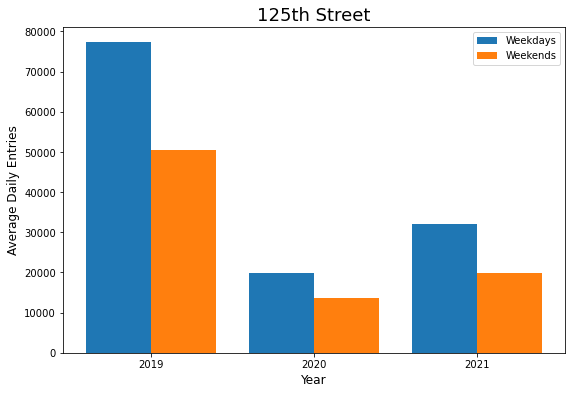

In [45]:
labels = ['2019', '2020', '2021']
weekday_125 = subset_dayofweek[(subset_dayofweek['STATION'] == '125 ST') &
                               (subset_dayofweek['day_type'] == 'Weekday')].DAILY_ENTRIES
weekend_125 = subset_dayofweek[(subset_dayofweek['STATION'] == '125 ST') &
                               (subset_dayofweek['day_type'] == 'Weekend')].DAILY_ENTRIES
x = np.arange(len(labels))
width = .4
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, weekday_125, width, label='Weekdays')
rects2 = ax.bar(x + width/2, weekend_125, width, label='Weekends')
ax.set_ylabel('Average Daily Entries',fontsize=12)
ax.set_xlabel('Year',fontsize=12)
ax.set_title('125th Street',fontsize=18)
ax.set_xticks(x, labels)
ax.legend()
fig.set_size_inches(9,6)
plt.savefig('125st')


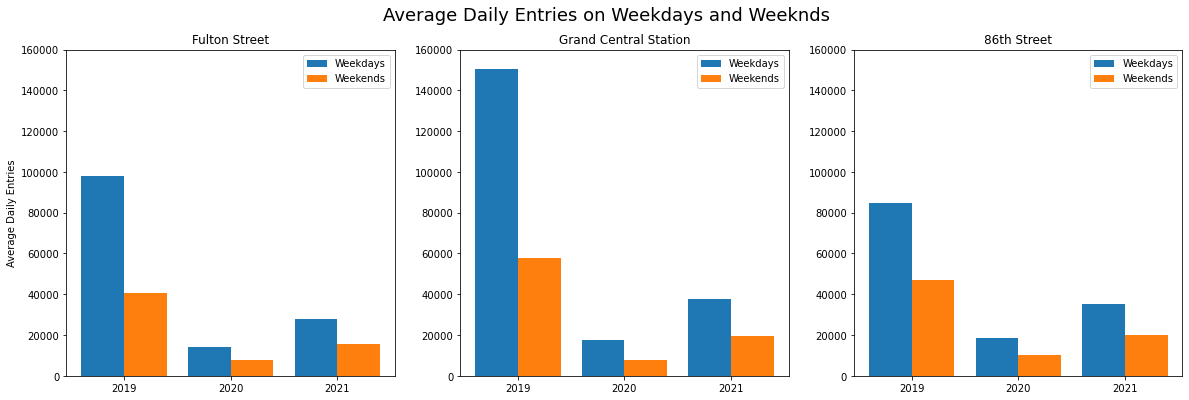

In [31]:
labels = ['2019', '2020', '2021']
weekday_fulton = subset_dayofweek[(subset_dayofweek['STATION'] == 'FULTON ST') &
                               (subset_dayofweek['day_type'] == 'Weekday')].DAILY_ENTRIES
weekend_fulton = subset_dayofweek[(subset_dayofweek['STATION'] == 'FULTON ST') &
                               (subset_dayofweek['day_type'] == 'Weekend')].DAILY_ENTRIES
weekday_gc = subset_dayofweek[(subset_dayofweek['STATION'] == 'GRD CNTRL-42 ST') &
                               (subset_dayofweek['day_type'] == 'Weekday')].DAILY_ENTRIES
weekend_gc = subset_dayofweek[(subset_dayofweek['STATION'] == 'GRD CNTRL-42 ST') &
                               (subset_dayofweek['day_type'] == 'Weekend')].DAILY_ENTRIES
weekday_86 = subset_dayofweek[(subset_dayofweek['STATION'] == '86 ST') &
                               (subset_dayofweek['day_type'] == 'Weekday')].DAILY_ENTRIES
weekend_86 = subset_dayofweek[(subset_dayofweek['STATION'] == '86 ST') &
                               (subset_dayofweek['day_type'] == 'Weekend')].DAILY_ENTRIES
x = np.arange(len(labels))
width = .4
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))
fig.suptitle("Average Daily Entries on Weekdays and Weeknds", fontsize=18)
rects1 = ax[0].bar(x - width/2, weekday_fulton, width, label='Weekdays')
rects2 = ax[0].bar(x + width/2, weekend_fulton, width, label='Weekends')
ax[0].set_ylabel('Average Daily Entries')
ax[0].set_title('Fulton Street')
ax[0].set_xticks(x, labels)
ax[0].set_ylim([0,160000])
ax[0].legend()
rects3 = ax[1].bar(x - width/2, weekday_gc, width, label='Weekdays')
rects4 = ax[1].bar(x + width/2, weekend_gc, width, label='Weekends')
ax[1].set_title('Grand Central Station')
ax[1].set_xticks(x, labels)
ax[1].set_ylim([0,160000])
ax[1].legend()
rects5 = ax[2].bar(x - width/2, weekday_86, width, label='Weekdays')
rects6 = ax[2].bar(x + width/2, weekend_86, width, label='Weekends')
ax[2].set_title('86th Street')
ax[2].set_xticks(x, labels)
ax[2].set_ylim([0,160000])
ax[2].legend()
plt.savefig('3_stations')
plt.show()





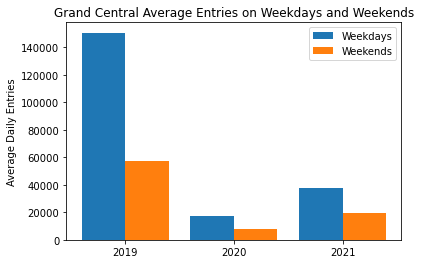

In [19]:
labels = ['2019', '2020', '2021']
weekday_gc = subset_dayofweek[(subset_dayofweek['STATION'] == 'GRD CNTRL-42 ST') &
                               (subset_dayofweek['day_type'] == 'Weekday')].DAILY_ENTRIES
weekend_gc = subset_dayofweek[(subset_dayofweek['STATION'] == 'GRD CNTRL-42 ST') &
                               (subset_dayofweek['day_type'] == 'Weekend')].DAILY_ENTRIES
x = np.arange(len(labels))
width = .4
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, weekday_gc, width, label='Weekdays')
rects2 = ax.bar(x + width/2, weekend_gc, width, label='Weekends')
ax.set_ylabel('Average Daily Entries')
ax.set_title('Grand Central Average Entries on Weekdays and Weekends')
ax.set_xticks(x, labels)
ax.legend()



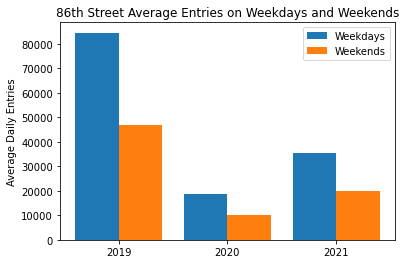

In [20]:
labels = ['2019', '2020', '2021']
weekday_86 = subset_dayofweek[(subset_dayofweek['STATION'] == '86 ST') &
                               (subset_dayofweek['day_type'] == 'Weekday')].DAILY_ENTRIES
weekend_86 = subset_dayofweek[(subset_dayofweek['STATION'] == '86 ST') &
                               (subset_dayofweek['day_type'] == 'Weekend')].DAILY_ENTRIES
x = np.arange(len(labels))
width = .4
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, weekday_86, width, label='Weekdays')
rects2 = ax.bar(x + width/2, weekend_86, width, label='Weekends')
ax.set_ylabel('Average Daily Entries')
ax.set_title('86th Street Average Entries on Weekdays and Weekends')
ax.set_xticks(x, labels)
ax.legend()


We see that in three of the four stations in our subset, number of subway entries has fallen much further on weekdays as opposed to weekends, and that, especially in 2021, the average number of weekend riders per day is much closer to the average number of weekday riders.  This information leads me to conclude that Commerical Real Estate firms looking to fill commerical space should be aware that the composition of their clientele has changed, and there are more people who are in the area of leisure as opposed to work.  This trend is true in Fulton Street, Grand Central Station, and 86th Street, but the proportion of weekday to weekend riders in 125th Streeet is close to what it was before the pandemic

In [21]:
col_list = ["License Type","License Status","License Creation Date","Address ZIP"]
license = pd.read_csv("/Users/augustinebowe/Downloads/Legally_Operating_Businesses.csv",usecols=col_list)

In [22]:
license.head()

,License Type,License Status,License Creation Date,Address ZIP
0,Individual,Inactive,11/04/2011,10459
1,Business,Inactive,02/04/2010,07726
2,Business,Active,07/27/2000,07430
3,Individual,Inactive,05/10/2002,10011
4,Individual,Inactive,05/31/2013,11103


In [23]:
license['DATE'] = pd.to_datetime(license['License Creation Date'])
license['YEAR'] = license.DATE.dt.year
license.head()

,License Type,License Status,License Creation Date,Address ZIP,DATE,YEAR
0,Individual,Inactive,11/04/2011,10459,2011-11-04,2011
1,Business,Inactive,02/04/2010,07726,2010-02-04,2010
2,Business,Active,07/27/2000,07430,2000-07-27,2000
3,Individual,Inactive,05/10/2002,10011,2002-05-10,2002
4,Individual,Inactive,05/31/2013,11103,2013-05-31,2013


Data on NYC business licenses was obtained from https://data.cityofnewyork.us/Business/Legally-Operating-Businesses/w7w3-xahh/data

In [24]:
license = license[(license.YEAR > 2018)]
license = license[(license.YEAR < 2022)]
license.head()

,License Type,License Status,License Creation Date,Address ZIP,DATE,YEAR
18,Business,Active,10/11/2019,11563,2019-10-11,2019
38,Business,Active,04/01/2019,10013,2019-04-01,2019
39,Business,Active,07/23/2020,10021,2020-07-23,2020
48,Individual,Inactive,09/24/2019,11203,2019-09-24,2019
52,Individual,Inactive,06/06/2019,11235,2019-06-06,2019


In [25]:
lic_years = license.groupby("YEAR").DATE.count()
lic_years.head()

YEAR
2019    9913
2020    3880
2021    4927
Name: DATE, dtype: int64

In [26]:
zips = ["10017","10007","10028","10035"]
zipsdict = {"10017":"Grand Central",
           "10007":"Fulton St",
           "10028":"86th St",
           "10035":"125th St"}
license = license[(license["Address ZIP"].isin(zips))]
license_bus = license[(license["License Type"] == "Business")]
license_bus.head()

,License Type,License Status,License Creation Date,Address ZIP,DATE,YEAR
217,Business,Active,07/23/2020,10017,2020-07-23,2020
218,Business,Active,10/10/2019,10017,2019-10-10,2019
290,Business,Inactive,11/25/2019,10035,2019-11-25,2019
4356,Business,Inactive,11/25/2019,10035,2019-11-25,2019
4373,Business,Inactive,11/25/2019,10035,2019-11-25,2019


In [27]:
license_zips = license_bus.groupby(["Address ZIP","YEAR"],as_index=False).DATE.count()
license_zips

,Address ZIP,YEAR,DATE
0,10007,2019,7
1,10007,2020,12
2,10007,2021,6
3,10017,2019,23
4,10017,2020,15
5,10017,2021,15
6,10028,2019,23
7,10028,2020,10
8,10028,2021,24
9,10035,2019,20


In [28]:
license_zips[(license_zips["YEAR"] == 2019)].DATE

0     7
3    23
6    23
9    20
Name: DATE, dtype: int64

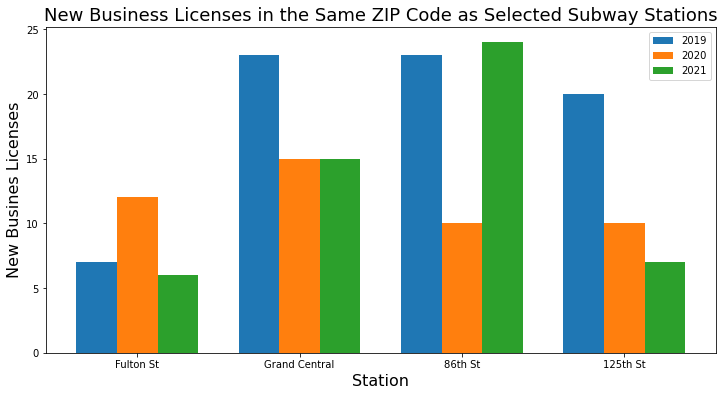

In [30]:
barWidth = 0.25

bars1 = license_zips[(license_zips["YEAR"] == 2019)].DATE
bars2 = license_zips[(license_zips["YEAR"] == 2020)].DATE
bars3 = license_zips[(license_zips["YEAR"] == 2021)].DATE
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize = (12,6))
plt.bar(r1, bars1, width=barWidth, label='2019')
plt.bar(r2, bars2, width=barWidth, label='2020')
plt.bar(r3, bars3, width=barWidth, label='2021')

plt.title('New Business Licenses in the Same ZIP Code as Selected Subway Stations',fontsize = 18)
plt.xlabel('Station',fontsize = 16)
plt.ylabel('New Busines Licenses',fontsize = 16)
plt.xticks([r + barWidth for r in range(len(bars1))], ['Fulton St', 'Grand Central', '86th St', '125th St'])
plt.legend()
plt.savefig('new_licenses')
plt.show()
